# Section 3: Keyword Analysis

## Focus:
How does the movie's category, content theme, and story source affect the economic gross?

## The Data:
The data are scrapped from the-numbers.com. The dataset include the top 100 movies each year from 2010 to the present.


   ### Time: 
- Release year
### Movies:
- Title (as individual unique identifier)
- Genre (the general category of the movie)
- Source (where is the screenplay coming from)
- Creative type (a more specific literal genre of the movie)
### Economic index:
- Budget (production cost)
- Domestic gross
- Worldwide gross & international gross
### Feature to be created:
- Net earnings (profit) = Revenue - Cost

## The Goals & Questions: 
- What are some popular genres or creative types associated with highly profitable movies?
- What type of sources or creative types are found within different genres?
- What type of sources are more profitable?

## Data Visualization Product:
- Distribution of the most popular keywords
- Keywords vs 
- box and whisker plot of averages per genre
- box and whisker of actual

# 3.0 Importing Libraries in need

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
%matplotlib inline

# 3.1 Data Wrangling and Fact Learning

In [3]:
# Christine posted the data on github, therefore, it will be read in directly through the url
url = 'https://raw.githubusercontent.com/xinegan88/some_files/master/master_df.csv'
df_raw = pd.read_csv(url)
df_raw.head(5)

,Year,Title,TheatricalDistributor,Genre,Source,ProductionMethod,CreativeType,Budget,DomesticGross,InternationalGross,WorldwideGross,NetProfits
0,2010,Toy Story 3,Walt Disney,Adventure,Original Screenplay,Digital Animation,Kids Fiction,200000000,415004880,653874642,1068879522,868879522
1,2010,Alice in Wonderland,Walt Disney,Adventure,Based on Fiction Book/Short Story,Animation/Live Action,Fantasy,200000000,334191110,691300000,1025491110,825491110
2,2010,Iron Man 2,Paramount Pictures,Action,Based on Comic/Graphic Novel,Live Action,Super Hero,170000000,312433331,308723058,621156389,451156389
3,2010,The Twilight Saga: Eclipse,Summit Entertainment,Drama,Based on Fiction Book/Short Story,Live Action,Fantasy,68000000,300531751,405571077,706102828,638102828
4,2010,Harry Potter and the Deathly Hallows:…,Warner Bros.,Adventure,Based on Fiction Book/Short Story,Animation/Live Action,Fantasy,125000000,296131568,664297789,960429357,835429357


In [4]:
# Overall statistics
df_raw.describe()

,Year,Budget,DomesticGross,InternationalGross,WorldwideGross,NetProfits
count,1099.000000,1.099000e+03,1.099000e+03,1.099000e+03,1.099000e+03,1.099000e+03
mean,2015.003640,6.256512e+07,9.173384e+07,1.373107e+08,2.290446e+08,1.664795e+08
std,3.162852,6.325756e+07,1.020307e+08,1.942675e+08,2.872626e+08,2.424378e+08
min,2010.000000,0.000000e+00,2.094300e+04,0.000000e+00,2.094300e+04,-7.037182e+07
25%,2012.000000,1.700000e+07,3.445786e+07,1.992907e+07,6.122220e+07,3.079959e+07
50%,2015.000000,4.000000e+07,5.701298e+07,6.247907e+07,1.248273e+08,7.690846e+07
75%,2018.000000,9.000000e+07,1.079556e+08,1.740452e+08,2.734119e+08,1.890649e+08
max,2020.000000,4.000000e+08,9.366622e+08,1.939428e+09,2.797801e+09,2.397801e+09


In [5]:
# Take a first look
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1099 entries, 0 to 1098
Data columns (total 12 columns):
Year                     1099 non-null int64
Title                    1099 non-null object
TheatricalDistributor    1099 non-null object
Genre                    1098 non-null object
Source                   1098 non-null object
ProductionMethod         1099 non-null object
CreativeType             1098 non-null object
Budget                   1099 non-null int64
DomesticGross            1099 non-null int64
InternationalGross       1099 non-null int64
WorldwideGross           1099 non-null int64
NetProfits               1099 non-null int64
dtypes: int64(6), object(6)
memory usage: 103.2+ KB


## <span style="color:##C71585"> **Note:** </span>
There is one movie within no information on Genre, Source, and CreativeType. It is worthwile looking at, assigning a value to it before deciding to drop this entry

In [6]:
# As I do not foresee using ProductionMethod, it is being dropped
df = df_raw.drop(['ProductionMethod'], axis=1)

In [7]:
row_nan = df.isnull()
rows_with_nan = df[row_nan.any(axis=1)]
rows_with_nan

,Year,Title,TheatricalDistributor,Genre,Source,CreativeType,Budget,DomesticGross,InternationalGross,WorldwideGross,NetProfits
1093,2020,Unsubscribe,Self Distributed,NaN,NaN,NaN,0,25488,0,25488,25488


## <span style="color:##C71585"> **Note:** </span>
Through researching, here is the movie: https://www.imdb.com/title/tt8825186/ <br/>

It seems to be very new comedy/documentry, with relatively low recognication; It is missing budget information and difficult to carry on to further analysis. Based on the plot and trailor, I do not think this movie can be assigned with a budget using the statistic from the entire dataset; the budget and gross are possibly going to be outliers. Therefore it will be excluded in this dataset for further analysis.


In [8]:
# Drop this movie by index
df = df.drop([1093])

In [9]:
# Making new columns for the profit margin
# Formula: profit margin = (sales - budget)/sales
df['Domestic_margin'] = (df.DomesticGross - df.Budget)/df.DomesticGross
df['International_margin'] = (df.InternationalGross - df.Budget)/df.InternationalGross
df['Overall_margin'] = (df.WorldwideGross - df.Budget)/df.WorldwideGross

In [10]:
# Take a quick look at if there are any extreme values
df.Domestic_margin.describe(), df.International_margin.describe(), df.Overall_margin.describe()

(count    1098.000000
 mean        0.198891
 std         0.941836
 min       -16.856784
 25%        -0.043567
 50%         0.412304
 75%         0.697497
 max         1.000000
 Name: Domestic_margin, dtype: float64, count    1061.000000
 mean            -inf
 std              NaN
 min             -inf
 25%        -0.105399
 50%         0.430837
 75%         0.691707
 max         1.000000
 Name: International_margin, dtype: float64, count    1098.000000
 mean        0.638280
 std         0.545632
 min       -10.868873
 25%         0.549336
 50%         0.720046
 75%         0.853264
 max         1.000000
 Name: Overall_margin, dtype: float64)

## <span style="color:##C71585"> **Note:** </span>
Both Domestic and Overall profit margin have extreme negative value as some movies with high budget didn't succeed in box office. International profit margin continues '-inf' which means the international gross revenue was 0 for the movie. Worthwhile to find out which movies had 0 international revenue. 

In [11]:
zero_intl = df[df.InternationalGross == 0]

print('There are',len(zero_intl),
      'movies did not have data for international revenue',
      'or did not distribute internationally.',
     'It would be interesting to look at their genres, sources, creative types later.')

There are 43 movies did not have data for international revenue or did not distribute internationally. It would be interesting to look at their genres, sources, creative types later.


In [12]:
# Checking with are the values available
print('Genres:', df.Genre.unique(), '\n'
      'Sources', df.Source.unique(), '\n'
      'Creativetype:', df.CreativeType.unique())

Genres: ['Adventure' 'Action' 'Drama' 'Thriller/Suspense' 'Musical' 'Western'
 'Comedy' 'Romantic Comedy' 'Horror' 'Documentary' 'Black Comedy'
 'Concert/Performance' 'Multiple Genres'] 
Sources ['Original Screenplay' 'Based on Fiction Book/Short Story'
 'Based on Comic/Graphic Novel' 'Based on Folk Tale/Legend/Fairytale'
 'Remake' 'Based on TV' 'Based on Real Life Events' 'Based on Game'
 'Based on Factual Book/Article' 'Based on Short Film' 'Spin-Off'
 'Based on Play' 'Based on Theme Park Ride' 'Based on Musical or Opera'
 'Based on Toy' 'Based on Religious Text' 'Based on Song' 'Based on Movie'
 'Compilation'] 
Creativetype: ['Kids Fiction' 'Fantasy' 'Super Hero' 'Science Fiction'
 'Contemporary Fiction' 'Historical Fiction' 'Dramatization' 'Factual'
 'Multiple Creative Types']


## <span style="color:##C71585"> **Note:** </span>
It is very interesting that in the genres, we see more than one Comedy type: Romantic Comedy, Black Comedy. Perhaps later on, those can be all labeled comedy to see if the humourous element plays a role in attractions. 

# 3.2 Visualization and Interpretations

The following section will be using the available data to create visualization which helps to interpret the market popularity and economic performance. 

In [13]:
#Heat Map: 
#Making a pivot table
genre_pivot = pd.pivot_table(df, values='WorldwideGross', index=['Genre'],
                    columns=['Year'], aggfunc=np.mean).fillna(0)
# Change the number to millions
for i in range(2010,2021):
    genre_pivot[i] = genre_pivot[i].apply(lambda x: "{:.2f}".format(x/1000000)).astype(float)
genre_pivot

Year,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
Genre,,,,,,,,,,,
Action,251.35,357.55,396.25,350.13,396.29,498.43,490.35,478.71,497.38,554.31,85.21
Adventure,388.99,349.70,390.55,379.18,388.53,412.21,488.72,379.10,376.08,536.53,110.75
Black Comedy,97.53,41.33,238.20,187.40,103.22,61.79,59.60,87.37,83.38,98.15,0.12
Comedy,137.52,148.63,139.88,132.28,140.45,127.06,112.93,94.25,93.26,69.06,5.41
Concert/Performance,0.00,99.03,32.70,50.43,0.00,0.00,23.59,0.00,0.00,0.00,0.84
Documentary,68.22,0.00,35.09,0.00,0.00,0.00,0.00,0.00,22.85,0.00,0.16
Drama,156.12,139.09,202.31,137.80,127.27,131.97,117.53,151.44,177.86,112.90,11.18
Horror,123.21,123.20,99.47,142.63,116.63,77.06,132.47,239.25,154.63,117.99,22.39
Multiple Genres,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.72


In [14]:
# Pivot table for genre, net profit means
group_genre_profit = pd.pivot_table(df, values='NetProfits', index=['Genre'],
                    columns=['Year'], aggfunc='mean').fillna(0)

# Change the number to millions
for i in range(2010,2021):
    group_genre_profit[i] = group_genre_profit[i].apply(lambda x: "{:.2f}".format(x/1000000)).astype(float)

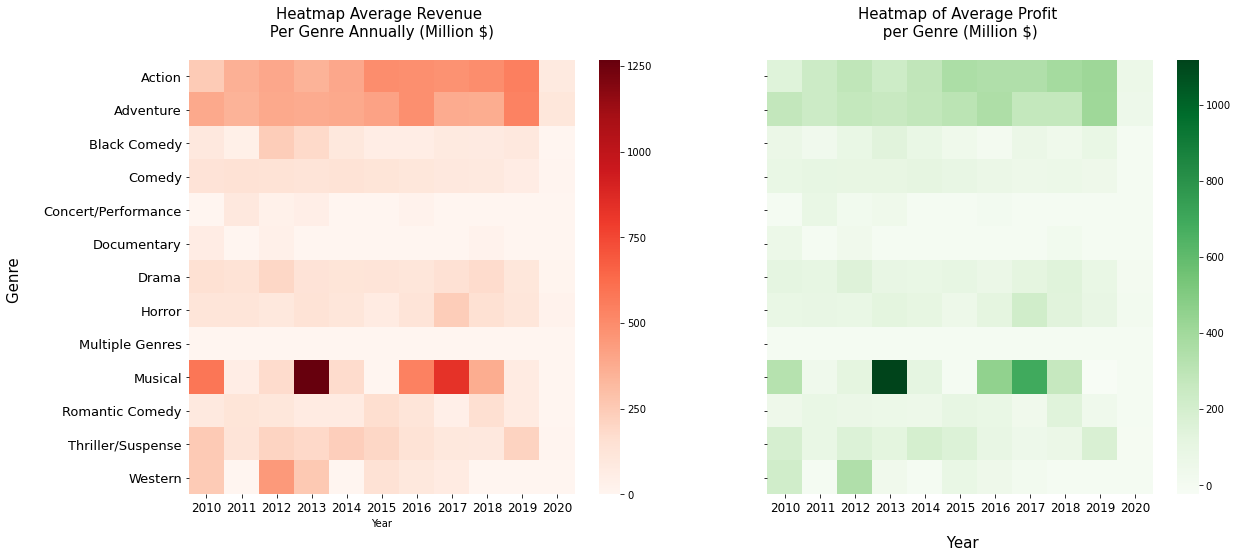

In [34]:
## 

f,(ax1,ax2) = plt.subplots(1,2, figsize=(19,8), sharey=True)


# Genre and overall revenue average
r1 = sns.heatmap(genre_pivot, cmap='Reds', ax=ax1)
r1.set_title("Heatmap Average Revenue \n Per Genre Annually (Million $) \n", fontsize=15)
r1.tick_params(axis='y', labelsize=13)
r1.tick_params(axis='x', labelsize=12)
r1.set_ylabel('Genre \n', fontsize=15)



# Genre and overall profit average

r2 = sns.heatmap(group_genre_profit, cmap='Greens', ax=ax2)
r2.set_title("Heatmap of Average Profit \n per Genre (Million $) \n", fontsize=15)
r2.set_ylabel("")
r2.set_xlabel('\n Year', fontsize=15)
r2.tick_params(axis='x', labelsize=12)
## Genre vs Revenue (by million dollars y-axis) by genre annually

## Theatretical Distributor 

### Overall Movie Production Number vs Average Revenue
**Question**:How's the overall top production number for Theatretical Distributor?
(There are many distributors and we will look at the top 10). 

In [16]:
group = df.groupby(df.TheatricalDistributor)['Budget','WorldwideGross','NetProfits'].mean()
count = df.groupby(df.TheatricalDistributor)['Title'].count()
combine = pd.merge(pd.DataFrame(group).reset_index(), 
                   pd.DataFrame(count).reset_index(), 
                  on='TheatricalDistributor').sort_values(by=['Title'], ascending=False)
combine.head()

,TheatricalDistributor,Budget,WorldwideGross,NetProfits,Title
66,Warner Bros.,7.714606e+07,2.556931e+08,1.785471e+08,165
58,Sony Pictures,5.887932e+07,2.054339e+08,1.465546e+08,146
63,Universal,6.023669e+07,2.563325e+08,1.960958e+08,139
1,20th Century Fox,7.753866e+07,2.638709e+08,1.863323e+08,119
46,Paramount Pictures,7.973000e+07,2.532109e+08,1.734809e+08,100


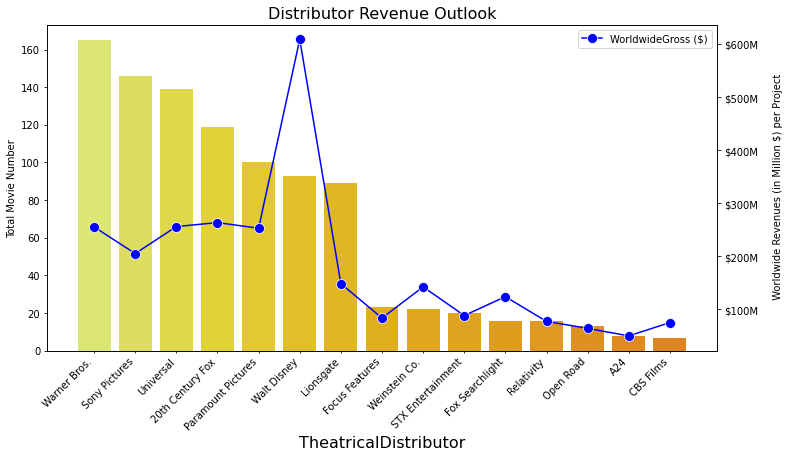

In [17]:
fig, ax1 = plt.subplots(figsize=(12,6))

def to_million(x, pos):
    return '$%1.0fM' % (x*1e-6)


# Total Production number
ax1.set_title('Distributor Revenue Outlook', fontsize=16)
ax1.set_xlabel('\n Distributor Name', fontsize=16)
ax1 = sns.barplot(x='TheatricalDistributor', y='Title', data = combine[:15], palette='Wistia', 
                  label = 'Total Movie Number')
ax1.tick_params(axis='x', rotation = 45, length=2)
ax1.set_xticklabels(combine.TheatricalDistributor[:15], ha='right')

ax1.set_ylabel('Total Movie Number', fontsize = 10)

# Gross revenue line

ax2 = ax1.twinx()

ax2 = sns.lineplot(x='TheatricalDistributor', y='WorldwideGross', data = combine[:15], sort=False, 
                   marker = 'o', markersize = 10, color='blue', label = 'WorldwideGross ($)')
ax2.tick_params(axis='y')
ax2.set_ylabel('\n WorldwideGross per Project ($)', fontsize = 10)
ax2.set_xlabel('\n Distributor Name', fontsize=16)

# Change Y-axis format for gross revenue
format_y = FuncFormatter(to_million)
ax2.yaxis.set_major_formatter(format_y)
ax2.set_ylabel('\n Worldwide Revenues (in Million $) per Project')

ax1.grid(False)
ax2.grid(False)

### Overall Movie Production Number vs Average Profit
**Question**:How's the overall revenue for Theatretical Distributor?
(There are many distributors and we will look at the top 10). 

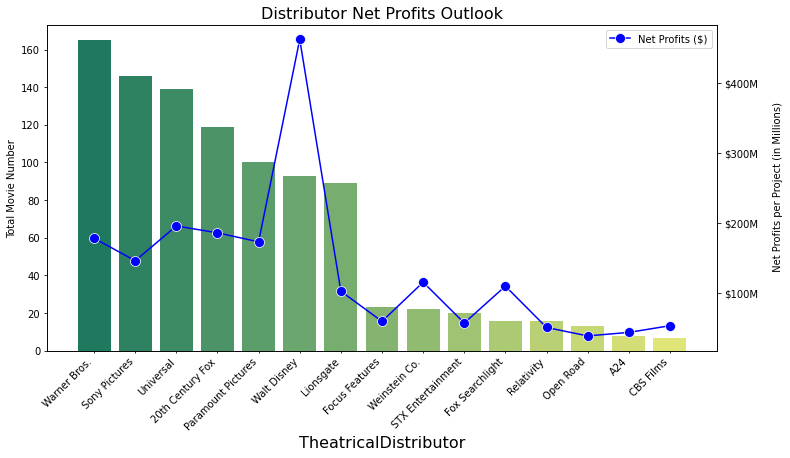

In [18]:
fig, ax1 = plt.subplots(figsize=(12,6))

def to_million(x, pos):
    return '$%1.0fM' % (x*1e-6)


# Total Production number
ax1.set_title('Distributor Net Profits Outlook', fontsize=16)
ax1.set_xlabel('\n Distributor Name', fontsize=16)
ax1 = sns.barplot(x='TheatricalDistributor', y='Title', data = combine[:15], palette='summer', 
                  label = 'Total Movie Number')
ax1.tick_params(axis='x', rotation = 45, length=2)
ax1.set_xticklabels(combine.TheatricalDistributor[:15], ha='right')

ax1.set_ylabel('Total Movie Number', fontsize = 10)

# Gross revenue line

ax2 = ax1.twinx()

ax2 = sns.lineplot(x='TheatricalDistributor', y='NetProfits', data = combine[:15], sort=False, 
                   marker = 'o', markersize = 10, color='blue', label = 'Net Profits ($)')
ax2.tick_params(axis='y')
ax2.set_ylabel('\n Net Profits per Project ($)', fontsize = 10)
ax2.set_xlabel('\n Distributor Name', fontsize=16)

# Change Y-axis format for gross revenue
format_y = FuncFormatter(to_million)
ax2.yaxis.set_major_formatter(format_y)
ax2.set_ylabel('\n Net Profits per Project (in Millions)')

ax1.grid(False)
ax2.grid(False)

## Distributor Genre Diversity

In [19]:
distri_genre = df.groupby(df.TheatricalDistributor).agg({"Genre": "nunique", "CreativeType": "nunique"})
combine_gen_econ = pd.merge(pd.DataFrame(distri_genre).reset_index(), 
                   pd.DataFrame(combine).reset_index(), 
                  on='TheatricalDistributor').sort_values(by=['Title'], ascending=False)
combine_gen_econ.head()

,TheatricalDistributor,Genre,CreativeType,index,Budget,WorldwideGross,NetProfits,Title
66,Warner Bros.,10,9,66,7.714606e+07,2.556931e+08,1.785471e+08,165
58,Sony Pictures,11,8,58,5.887932e+07,2.054339e+08,1.465546e+08,146
63,Universal,10,7,63,6.023669e+07,2.563325e+08,1.960958e+08,139
1,20th Century Fox,8,7,1,7.753866e+07,2.638709e+08,1.863323e+08,119
46,Paramount Pictures,11,8,46,7.973000e+07,2.532109e+08,1.734809e+08,100


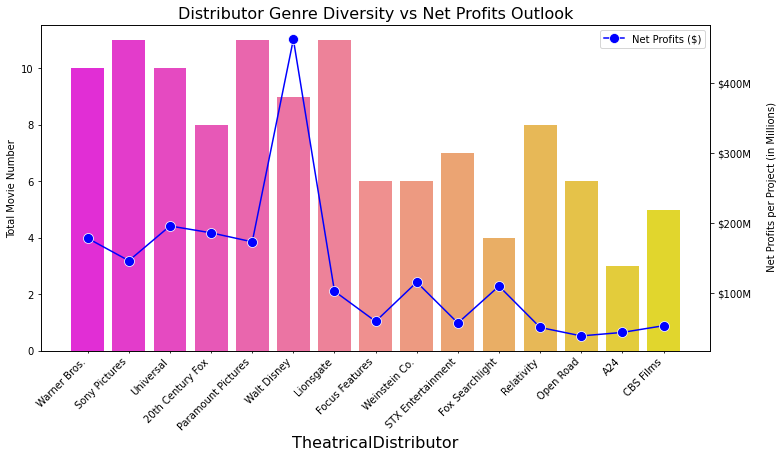

In [37]:
#Diversity and profit 
fig, ax1 = plt.subplots(figsize=(12,6))

def to_million(x, pos):
    return '$%1.0fM' % (x*1e-6)


# Total Production number
ax1.set_title('Distributor Genre Diversity vs Net Profits Outlook', fontsize=16)
ax1.set_xlabel('\n Distributor Name', fontsize=16)
ax1 = sns.barplot(x='TheatricalDistributor', y='Genre', data = combine_gen_econ[:15], palette='spring', 
                  label = 'Genre Type Count')
ax1.tick_params(axis='x', rotation = 45, length=2)
ax1.set_xticklabels(combine.TheatricalDistributor[:15], ha='right')

ax1.set_ylabel('Total Movie Number', fontsize = 10)

# Gross revenue line

ax2 = ax1.twinx()

ax2 = sns.lineplot(x='TheatricalDistributor', y='NetProfits', data = combine_gen_econ[:15], sort=False, 
                   marker = 'o', markersize = 10, color='blue', label = 'Net Profits ($)')
ax2.tick_params(axis='y')
ax2.set_ylabel('\n Net Profits per Project ($)', fontsize = 10)
ax2.set_xlabel('\n Distributor Name', fontsize=16)

# Change Y-axis format for gross revenue
format_y = FuncFormatter(to_million)
ax2.yaxis.set_major_formatter(format_y)
ax2.set_ylabel('\n Net Profits per Project (in Millions)')

ax1.grid(False)
ax2.grid(False)

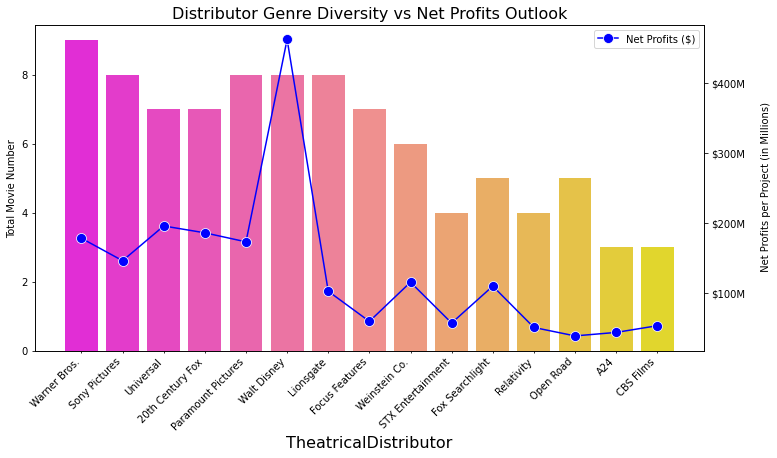

In [36]:
#Literature Theme and profit 
fig, ax1 = plt.subplots(figsize=(12,6))

def to_million(x, pos):
    return '$%1.0fM' % (x*1e-6)


# Total Production number
ax1.set_title('Distributor Genre Diversity vs Net Profits Outlook', fontsize=16)
ax1.set_xlabel('\n Distributor Name', fontsize=16)
ax1 = sns.barplot(x='TheatricalDistributor', y='CreativeType', data = combine_gen_econ[:15], palette='spring', 
                  label = 'Content Style Category Count')
ax1.tick_params(axis='x', rotation = 45, length=2)
ax1.set_xticklabels(combine.TheatricalDistributor[:15], ha='right')

ax1.set_ylabel('Total Movie Number', fontsize = 10)

# Gross revenue line

ax2 = ax1.twinx()

ax2 = sns.lineplot(x='TheatricalDistributor', y='NetProfits', data = combine_gen_econ[:15], sort=False, 
                   marker = 'o', markersize = 10, color='blue', label = 'Net Profits ($)')
ax2.tick_params(axis='y')
ax2.set_ylabel('\n Net Profits per Project ($)', fontsize = 10)
ax2.set_xlabel('\n Distributor Name', fontsize=16)

# Change Y-axis format for gross revenue
format_y = FuncFormatter(to_million)
ax2.yaxis.set_major_formatter(format_y)
ax2.set_ylabel('\n Net Profits per Project (in Millions)')

ax1.grid(False)
ax2.grid(False)